In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
import tensorflow as tf

In [2]:
# city = ['上海', '北京', '南京', '厦门', '合肥', '广州', '成都', '杭州', '武汉', '济南', '深圳', '烟台', '石家庄', '苏州', '西安', '重庆', '长沙', '青岛']
city_name = '厦门'
raw_data = pd.read_csv('Data/model_data/' + city_name + '.csv')
split = int( 0.85*len(raw_data) )

train = raw_data[:split]
X_train = train.drop("modifiedUnitPrice", axis=1)
Y_train = train['modifiedUnitPrice']

test = raw_data[split:]
X_test = test.drop("modifiedUnitPrice", axis=1)
Y_actual = test['modifiedUnitPrice']

In [3]:
'''Polynomial Regression Model'''

poly_reg = PolynomialFeatures(degree = 2)
X_ploy = poly_reg.fit_transform(X_train)
linreg = LinearRegression()
model = linreg.fit(X_ploy,Y_train)

print(model.coef_)

[-5.06201025e-04 -6.38472914e-04  1.14597780e-03  4.62817431e-04
  1.05732056e-03 -5.09906934e-04 -6.58976181e-04  1.05039442e-03
  7.27428566e-05 -1.92895036e-02 -2.53362988e-04 -3.13452602e-04
 -1.58944957e-04  2.97748402e-03  1.47490432e-05  3.47808194e-04
  1.09856806e-03 -8.09752761e-05 -2.65862787e-04 -6.41705785e-07
 -3.89756430e-05  1.40878841e-04  1.14367371e-04 -3.55926080e-08
 -4.37692099e-04 -1.03193470e-06  8.02873734e-07 -1.21702609e-05
 -6.72353088e+01 -7.40748632e+01 -2.31507539e+02 -1.15624708e+02
  1.22280765e+01  3.38098335e+02  7.44972249e+01  2.97719122e+01
  3.80305557e+02  1.26250559e+02  8.14234566e+01 -8.64534586e-02
 -8.62413556e+02  2.04657798e-01  1.15336740e-01 -4.00876487e-01
 -2.72591001e-01  2.95733061e-01  1.14284382e-01  6.97565021e+00
 -2.56375364e+00 -5.27828668e+00 -2.53688144e+00  3.39750109e+02
 -2.94065125e-03  4.82818782e-01 -1.81116304e+00 -6.14622453e+02
 -2.06366720e+02  2.33466941e+02  5.18035561e+01  2.68785738e+02
  1.27009001e+02 -1.10181

In [4]:
predict_price = []
actual_price = []

for i in range(0, 100):
    n = np.random.randint(len(test))
    Y_pred = linreg.predict( poly_reg.fit_transform(X_test) )[n]
    predict_price.append(Y_pred)
    Y_label = Y_actual.tolist()[n]
    actual_price.append(Y_label)


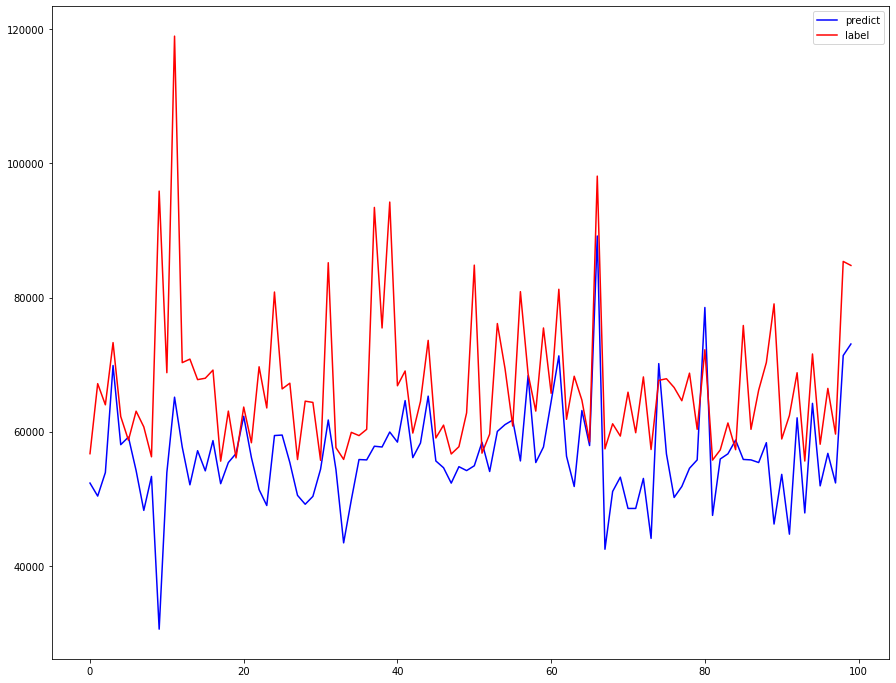

In [5]:
plt.figure(figsize=(15, 12))
plt.plot(range(len(predict_price)),predict_price,'b',label="predict")
plt.plot(range(len(actual_price)),actual_price,'r',label="label")
plt.legend(loc="upper right")


In [6]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.utils import shuffle
import tensorflow as tf

In [7]:
# city = ['上海', '北京', '南京', '厦门', '合肥', '广州', '成都', '杭州', '武汉', '济南', '深圳', '烟台', '石家庄', '苏州', '西安', '重庆', '长沙', '青岛']
city_name = '厦门'
# Separate price label
raw_data = pd.read_csv('Data/model_data/' + city_name + '.csv')
X_train = raw_data.drop("modifiedUnitPrice", axis=1)
Y_train = raw_data['modifiedUnitPrice']

# Format into numpy array
x_data = np.array(X_train)
y_data = np.array(Y_train)
# Max and min value of price
former_y_min = np.min(y_data)  
former_y_max = np.max(y_data)

# Min-Max scale, missing value is transformed into 0 or 1 accordingly
for i in range(27):
    # All missing in the column
    if x_data[:,i].min() == -999 and x_data[:,i].max() == -999:
        x_data[:,i] = 0
        continue
    # No missing in the column
    elif x_data[:,i].min() != -999:
        x_data[:,i] = (x_data[:,i] - x_data[:,i].min())/(x_data[:,i].max() - x_data[:,i].min())
        continue
    
    # Find the actual min_value of the column, instead of -999
    former_x_min = 2147483647
    for j in range(len(x_data[:,i])):
        if x_data[:,i][j] == -999:
            continue
        elif former_x_min > x_data[:,i][j]:
            former_x_min = x_data[:,i][j]
    
    # Transform -999 into 1, and other value into [0,1]
    for j in range(len(x_data[:,i])):
        if x_data[:,i][j] == -999:
            x_data[:,i][j] = 1
        else:
            x_data[:,i][j] = (x_data[:,i][j] - former_x_min)/(x_data[:,i].max() - former_x_min)
        
# Transform house price into [0,1]
for i in range(len(y_data)):
    y_data[i] = (y_data[i] - former_y_min) / (former_y_max - former_y_min)
    
print(x_data)
    

[[1.         1.         1.         ... 0.66574867 0.         1.        ]
 [1.         1.         1.         ... 0.19350965 0.         1.        ]
 [1.         1.         1.         ... 0.26940198 0.         1.        ]
 ...
 [1.         1.         1.         ... 1.         0.         1.        ]
 [0.5        0.5        1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 0.63215018 0.         1.        ]]


In [8]:
'''Linear Regression Model'''

x = tf.placeholder(tf.float32,[None,27],name = "X")
y = tf.placeholder(tf.float32,[None,1],name = "Y") 

# y = Wx + b, W is the feature matrix
with tf.name_scope('Model'):
    
    # w: random number, shape = (27, 1)
    w = tf.Variable(tf.random_normal([27, 1], stddev=0.01, name='W'), tf.float32)
    # b: 1.0
    b = tf.Variable(1.0, name='b')
    # matrix multiply
    def model(x, w, b):
        return tf.matmul(x, w) + b
    
    # Forward propagation
    pred = model(x, w, b)

In [9]:
train_epochs = 50
learning_rate = 0.01

with tf.name_scope('LossFunction'):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

W0821 18:56:10.690783 4363589056 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs,ys in zip(x_data,y_data):
        
        xs = xs.reshape(1,27)
        ys = ys.reshape(1,1)
        # Feed data
        _,loss = sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})

        loss_sum = loss_sum + loss
    
    # Reorder data to avoid fake output
    x_data,y_data = shuffle(x_data,y_data)
    
    b0temp = b.eval(session=sess)           
    w0temp = w.eval(session=sess)            
    loss_average = loss_sum/len(y_data) 
    
    print("epoch=",epoch+1,"loss=",loss_average,"b=",b0temp,"w=",w0temp)


epoch= 1 loss= 0.0026132946560747886 b= 0.6150797 w= [[ 4.82482612e-02]
 [ 2.83691883e-02]
 [-3.03687993e-05]
 [ 1.93891935e-02]
 [-6.66725356e-03]
 [-3.15426663e-03]
 [ 3.20874937e-02]
 [ 2.57581398e-02]
 [ 2.72385776e-02]
 [ 6.56568119e-03]
 [ 2.04479252e-03]
 [ 2.31806897e-02]
 [ 6.51396206e-03]
 [-1.43382205e-02]
 [ 3.71799953e-02]
 [ 5.63744567e-02]
 [ 1.58601031e-02]
 [ 3.43986340e-02]
 [ 2.08814628e-02]
 [ 2.55012559e-03]
 [ 2.18507648e-02]
 [-9.74821206e-03]
 [-1.05524471e-03]
 [ 3.08205672e-02]
 [-2.49332935e-03]
 [-1.03697088e-02]
 [ 1.92961209e-02]]
epoch= 2 loss= 0.006643889956006853 b= 0.20101121 w= [[ 0.06227981]
 [-0.06340045]
 [ 0.18248592]
 [-0.05399022]
 [-0.00151524]
 [-0.02180941]
 [-0.01023754]
 [ 0.06088451]
 [-0.24529761]
 [-0.00320854]
 [-0.01509483]
 [-0.02226681]
 [ 0.01208175]
 [-0.08320282]
 [-0.0026735 ]
 [ 0.0328115 ]
 [-0.00999845]
 [-0.00696883]
 [ 0.01335104]
 [-0.00552047]
 [ 0.16861464]
 [-0.00707134]
 [-0.00438935]
 [-0.00614766]
 [ 0.19740286]
 [-0.

epoch= 18 loss= 0.0026173814160036753 b= 0.029693559 w= [[ 5.9152208e-02]
 [-3.9339885e-02]
 [ 3.1624165e-01]
 [ 4.0367823e-02]
 [-4.8034465e-01]
 [-6.1361920e-03]
 [-2.0152221e-03]
 [ 2.9353138e-02]
 [-4.5581988e-01]
 [ 1.4455602e-02]
 [-6.7434390e-03]
 [-1.3289485e-03]
 [ 4.7619757e-03]
 [ 2.4570487e-02]
 [ 4.2777258e-04]
 [ 1.4653929e-02]
 [-1.0162281e-02]
 [ 2.0043029e-02]
 [ 2.5086456e-03]
 [-7.7829234e-02]
 [ 8.3754110e-01]
 [ 1.1731323e-02]
 [ 1.2030153e-02]
 [ 1.2396154e-04]
 [ 1.6493933e-01]
 [-1.0369709e-02]
 [-3.9764452e-03]]
epoch= 19 loss= 0.002584606511083107 b= 0.032690637 w= [[ 0.06282881]
 [-0.03458447]
 [ 0.317036  ]
 [ 0.04409968]
 [-0.49674392]
 [-0.00650361]
 [-0.00348598]
 [ 0.03561787]
 [-0.4586874 ]
 [ 0.00440735]
 [-0.00761227]
 [ 0.00273622]
 [ 0.00934017]
 [ 0.01963271]
 [ 0.00291759]
 [ 0.01706879]
 [-0.01814191]
 [ 0.01315806]
 [ 0.01102811]
 [-0.08104245]
 [ 0.8674708 ]
 [ 0.0123049 ]
 [ 0.01332922]
 [ 0.0041158 ]
 [ 0.16930528]
 [-0.01036971]
 [-0.0012910

In [ ]:
# Randomly pick out 100 records to predict and compare with label data

predict_price = []
actual_price = []
for i in range(0, 100):
    n = np.random.randint(len(raw_data))
    x_test = x_data[n]
    x_test = x_test.reshape(1,27)
    predict = sess.run(pred,feed_dict={x:x_test})
    
    predict_price.append(predict[0][0])
    actual_price.append(y_data[n])
#     print("预测值：" + str(predict[0][0]))
#     label = y_data[n]
#     print("标签值：" + str(label) + ', ' + str(np.array(Y_train)[n]))


plt.figure(figsize=(15, 12))
plt.plot(range(len(predict_price)),predict_price,'b',label="predict")
plt.plot(range(len(actual_price)),actual_price,'r',label="label")
plt.legend(loc="upper right")